<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 7</h3>
    <h3>Ejercicio 1</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

Darts es una biblioteca para analisis y pronostico de series de tiempo. Es especialmente útil porque: podemos aplicar y comparar varios modelos de series temporales. facilita el proceso de preprocesamiento, modelado, ajuste y evaluacion de series de tiempo. incluye funciones de evaluación y herramientas para trabajar tanto con modelos clasicos como con tecnicas de deep learning y AutoML.

In [ ]:
! pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.2/934.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.6 MB/s eta 0:00:0

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import darts
from darts.ad import QuantileDetector # Es una herramienta de deteccion de anomalias en Darts.
from prophet import Prophet

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index('date')
df.head(5)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


Aqui convertimos una serie temporal de un dataframes pandas en un objeto "TimeSeries" de la libreria Darts

<Axes: xlabel='date'>

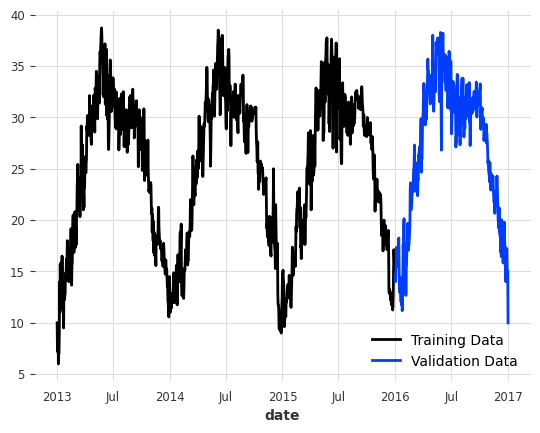

In [ ]:
ts = darts.TimeSeries.from_series(df.meantemp)  # from_series convierte en un formato de TimeSeries de Darts
train, val = ts.split_before(0.75)  # split_before es una fc Darts que permite crear estos conjuntos
train.plot(label="Training Data")
val.plot(label="Validation Data")

Percentage of values outside quantiles: 5.814 %


<Axes: >

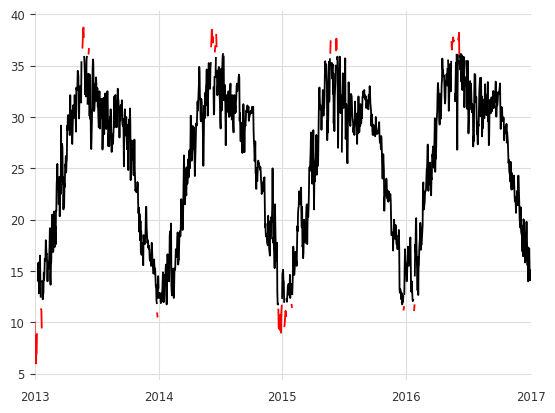

In [ ]:
# Aqui inicializa la funcion y toma a los valores por abajo de 0.03 y por arriba de 0.97 como anomalias.
anomaly_detector = QuantileDetector(low_quantile=0.03, high_quantile=0.97)
anomalies = anomaly_detector.fit_detect(ts)

l = anomalies.pd_series().values
print("Percentage of values outside quantiles:",
      round(sum(l)/len(l)*100, 3), "%")

# Aca arma un rango de fechas segun el índice mínimo y máximo de la base ts.
idx = pd.date_range(min(ts.pd_series().index), max(ts.pd_series().index))
anomalies = ts.pd_series()[np.array(l,dtype=bool)].reindex(idx,
                                                         fill_value=np.nan)
normal = ts.pd_series()[~np.array(l,dtype=bool)].reindex(idx,
                                                         fill_value=np.nan)

normal.plot(color="black", label="Normal")
anomalies.plot(color="red", label="Anomalies")

Aqui se identifica la estacionalidad de la serie temporal

In [ ]:
for m in range(2, 370):
        seasonal, period = darts.utils.statistics.check_seasonality(train,
                                              m=m, max_lag=400, alpha=0.05)
        if seasonal:
            print("Seasonality of order:", str(period))

Seasonality of order: 354
Seasonality of order: 356
Seasonality of order: 361


MAPE:  11.35502386786919


<Axes: xlabel='date'>

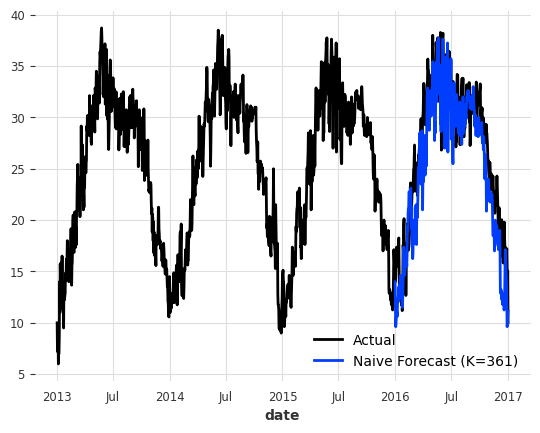

In [ ]:
k = 361 # Aca toma la estacionalidad indicada en el pto anterior.
naive_model = darts.models.NaiveSeasonal(K=k)
naive_model.fit(train)
naive_forecast = naive_model.predict(len(val))

print("MAPE: ", darts.metrics.mape(ts, naive_forecast))
ts.plot(label="Actual")
naive_forecast.plot(label="Naive Forecast (K=" + str(k) + ")")

https://unit8co.github.io/darts/generated_api/darts.models.forecasting.lgbm.html

In [ ]:
# AQui, es una funcion q evaluamos modelos

def model_check(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print(str(model) + ", MAPE: ", darts.metrics.mape(ts, forecast))
    return model

In [ ]:
# Este modelo hace un suavizamiento de la serie a través de una media móvil ponderada en la que los pesos decrecen exponencialmente con el tiempo ( mas peso a las mas recientes ).
exp_smoothing = model_check(darts.models.ExponentialSmoothing())


ExponentialSmoothing(), MAPE:  37.755880681351535


In [ ]:
# arima = model_check(darts.models.ARIMA())
auto_arima = model_check(darts.models.AutoARIMA())


AutoARIMA(), MAPE:  32.594215557506985


El modelo N-BEATS (Neural Basis Expansion Analysis Time Series Forecasting) es una arquitectura de red neuronal diseñada para la predicción de series temporales.

[Visitar este enlace para mayor informacion](https://unit8co.github.io/darts/examples/07-NBEATS-examples.html)

In [ ]:
NBEATSModel = model_check(darts.models.NBEATSModel(input_chunk_length=361,
                                     output_chunk_length=len(val)))

'''
Comentarios :

input_chunk_length es cuantos valores pasados se usan para realizar la prediccion.
output_chunk_lengthdefine la longitud de las predicciones

'''

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 8.9 M  | train
-------------------------------------------------------------
8.9 M     Trainable params
3.5 K     Non-trainable params
8.9 M     Total params
35.638    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

NBEATSModel(input_chunk_length=361, output_chunk_length=367), MAPE:  10.618765037489668


In [ ]:
prophet = model_check(darts.models.Prophet())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5fczf54u/v6hjsxx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5fczf54u/c1dzo39b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14756', 'data', 'file=/tmp/tmp5fczf54u/v6hjsxx7.json', 'init=/tmp/tmp5fczf54u/c1dzo39b.json', 'output', 'file=/tmp/tmp5fczf54u/prophet_model3gkw6siy/prophet_model-20241104170159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:02:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet(), MAPE:  9.912582487738016


In [ ]:
RNN_lstm = model_check(darts.models.RNNModel(model='LSTM', input_chunk_length=361,training_length=365))


# MAPE:  26.899713968893842 con input_chunk_length = 10
# MAPE:  26.43472454670545 con  input_chunk_length=361

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.8 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params
0.011     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

RNNModel(model=LSTM, training_length=365, input_chunk_length=361), MAPE:  28.60413909756229


In [ ]:
LightGBL = model_check(darts.models.LightGBMModel(lags=361))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82705
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 361
[LightGBM] [Info] Start training from score 24.991884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Se han truncado las últimas 5000 líneas del flujo de salida.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5fczf54u/1owrys8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28371', 'data', 'file=/tmp/tmp5fczf54u/j2ya2kqz.json', 'init=/tmp/tmp5fczf54u/1owrys8c.json', 'output', 'file=/tmp/tmp5fczf54u/prophet_model04wv_7eg/prophet_model-20241104171757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
 10%|█         | 58/557 [00:24<03:24,  2.44it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5fczf54u/t2q_gax9.json
DEBUG:cmdstanpy:input tempfile: /

MAPE:  7.8446894089753005


<Axes: xlabel='time'>

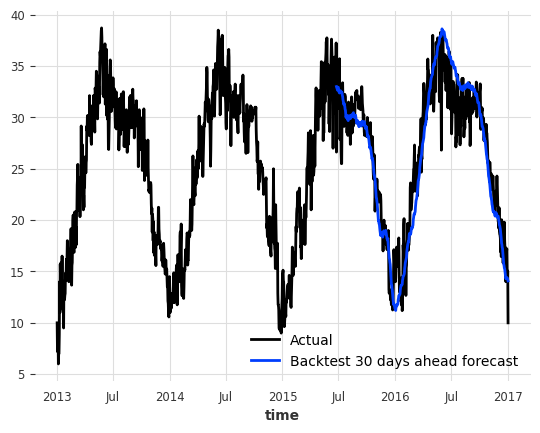

In [ ]:
historical_fcast = prophet.historical_forecasts(ts,
                           start=0.6, forecast_horizon=30, verbose=True)   # el backtesting comenzará desde el 60% de la serie temporal y se predicen 30 días adelante.

print("MAPE: ", darts.metrics.mape(ts, historical_fcast))
ts.plot(label="Actual")
historical_fcast.plot(label="Backtest 30 days ahead forecast")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 14.7 M | train
-------------------------------------------------------------
14.7 M    Trainable params
7.8 K     Non-trainable params
14.7 M    Total params
58.866    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE:  11.52823032391502


<Axes: xlabel='date'>

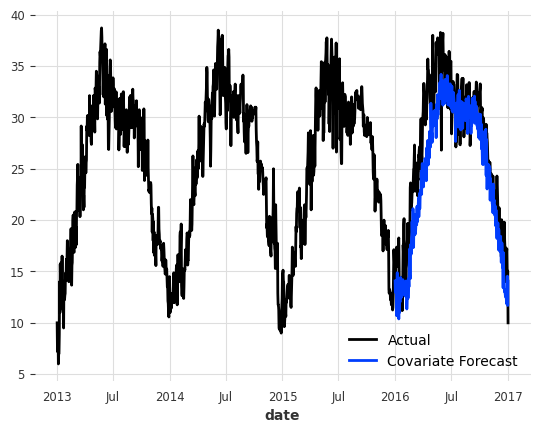

In [ ]:
# Aqui crea las series temporales para las covariables
humidity = darts.TimeSeries.from_series(df.humidity)
wind_speed = darts.TimeSeries.from_series(df.wind_speed)

cov_model = darts.models.NBEATSModel(input_chunk_length=361,
                                     output_chunk_length=len(val))
# El modelo entrena con los datos de train y con las covariables pasadas
cov_model.fit(train, past_covariates=humidity.stack(wind_speed))
cov_forecast = cov_model.predict(len(val),
                               past_covariates=humidity.stack(wind_speed))

print("MAPE: ", darts.metrics.mape(ts, cov_forecast))
ts.plot(label="Actual")
cov_forecast.plot(label="Covariate Forecast")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83181
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 363
[LightGBM] [Info] Start training from score 24.991884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MAPE:  10.607059332630774


<Axes: xlabel='date'>

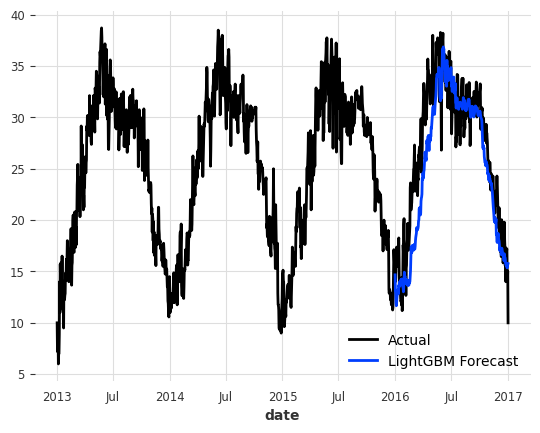

In [ ]:
humidity = darts.TimeSeries.from_series(df.humidity)
wind_speed = darts.TimeSeries.from_series(df.wind_speed)

lightgbm_model = darts.models.LightGBMModel(lags=361, lags_past_covariates=[-361])

# Aqui fitea el modelo con los datos de train y las covariables dadas
lightgbm_model.fit(train, past_covariates=humidity.stack(wind_speed))

lightgbm_forecast = lightgbm_model.predict(len(val),
                                           past_covariates=humidity.stack(wind_speed))

print("MAPE: ", darts.metrics.mape(val, lightgbm_forecast))

ts.plot(label="Actual")
lightgbm_forecast.plot(label="LightGBM Forecast")

In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
" Aqui es la preparación previa a la implementación y evaluación de modelos de series temporales."

# %load_ext autoreload # recargar automáticamente módulos cuando cambian sin que se reinicie la sesión.
# %autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

from darts.models import (
    ExponentialSmoothing,
    KalmanForecaster,
    LinearRegressionModel,
    NaiveDrift,
    NaiveEnsembleModel,
    NaiveSeasonal,
    RandomForest,
    RegressionEnsembleModel,
    TCNModel,
)
from darts.metrics import mape
from darts.utils.timeseries_generation import (
    datetime_attribute_timeseries as dt_attr,
)
from darts.dataprocessing.transformers import Scaler

import warnings

warnings.filterwarnings("ignore")

import logging

logging.disable(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NaiveEnsemble (naive) MAPE: 10.8303


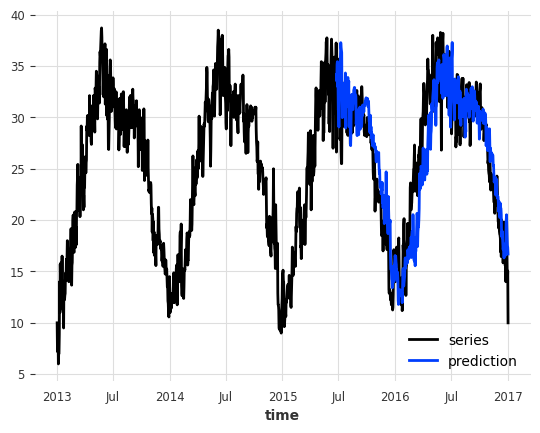

In [ ]:
#Aqui ensamble  y backtesting de dos modelos ingenuos

naive_ensemble = NaiveEnsembleModel(
    forecasting_models=[NaiveSeasonal(K=365), NaiveDrift()]
)

backtest = naive_ensemble.historical_forecasts(ts, start=0.6, forecast_horizon=30)

ts.plot(label="series")
backtest.plot(label="prediction")
print("NaiveEnsemble (naive) MAPE:", round(mape(backtest, ts), 5))

In [ ]:
candidates_models = {
    "LinearRegression": (LinearRegressionModel, {"lags": 12}),
    "ExponentialSmoothing": (ExponentialSmoothing, {}),
    "RandomForest": (RandomForest, {"lags": 12, "random_state": 0}),
}

backtest_models = []

for model_name, (model_cls, model_kwargs) in candidates_models.items():
    model = model_cls(**model_kwargs)
    backtest_models.append(
        model.historical_forecasts(ts, start=0.6, forecast_horizon=30)
    )
    print(f"{model_name} MAPE: {round(mape(backtest_models[-1], ts), 5)}")

LinearRegression MAPE: 15.2178
ExponentialSmoothing MAPE: 16.33277
RandomForest MAPE: 16.0631


FIN DEL CODIGO